In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import scipy.io as sio
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader


In [11]:
insole_data_path = Path("data/112024")
insole_data = sio.loadmat(insole_data_path / "gait_recording_112024_walk2.mat")

In [54]:
vicon_data_path = Path("data/Pilot_Data/Session_two")
vicon_force_data = pd.read_csv(vicon_data_path / "Faster.csv", skiprows = 3, nrows = 120003)

/Users/andreacheng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [55]:
vicon_force_data.head()

,Frame,Sub Frame,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz,Fx.1,Fy.1,Fz.1,Mx.1,My.1,Mz.1,Cx.1,Cy.1,Cz.1
0,NaN,NaN,N,N,N,N.mm,N.mm,N.mm,mm,mm,mm,N,N,N,N.mm,N.mm,N.mm,mm,mm,mm
1,1.0,0.0,18.4976,-4.42645,-386.524,24038.9,-48614.3,4072.62,124.227,-62.1925,0,-17.8758,-3.33944,-323.813,19777.9,35205.5,-5002.64,-141.278,-61.0782,0
2,1.0,1.0,15.8978,-4.89669,-383.191,23542.2,-48314.1,3797.16,123.916,-61.4372,0,-18.1927,-2.26296,-325.903,19383,35430.5,-5148.45,-141.285,-59.4747,0
3,1.0,2.0,17.1106,-4.42616,-384.859,23266.1,-48458.4,4192.45,124.088,-60.4535,0,-17.8699,-3.32206,-322.612,20024.5,35251,-4450.14,-140.732,-62.0701,0
4,1.0,3.0,17.2627,-3.80899,-384.711,23417.3,-48442.2,3971.98,124.082,-60.8699,0,-17.7389,-3.50557,-323.665,18879,34886.6,-4372.51,-142.214,-58.329,0


In [56]:
vicon_force_data[vicon_force_data["Frame"]==1997.0]

,Frame,Sub Frame,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz,Fx.1,Fy.1,Fz.1,Mx.1,My.1,Mz.1,Cx.1,Cy.1,Cz.1
19961,1997.0,0.0,0,0,0,0,0,0,250,0,0,-39.0588,-2.22474,-558.949,115952,85608,-13397.9,-96.8411,-207.446,0
19962,1997.0,1.0,0,0,0,0,0,0,250,0,0,-35.8699,2.08814,-561.531,119246,85012.1,-15285.2,-98.6067,-212.359,0
19963,1997.0,2.0,0,0,0,0,0,0,250,0,0,-35.42,8.84073,-563.308,123677,85611,-14145.7,-98.021,-219.555,0
19964,1997.0,3.0,0,0,0,0,0,0,250,0,0,-34.7874,12.8794,-565.857,126509,86266.5,-16658.5,-97.5473,-223.57,0
19965,1997.0,4.0,0,0,0,0,0,0,250,0,0,-34.5186,15.6944,-569.144,128238,86261.7,-15415.2,-98.4361,-225.317,0
19966,1997.0,5.0,0,0,0,0,0,0,250,0,0,-35.8901,17.7732,-571.209,129936,87270.8,-14258.5,-97.2174,-227.475,0
19967,1997.0,6.0,0,0,0,0,0,0,250,0,0,-39.2594,18.1502,-572.376,131880,87221.2,-13783.3,-97.6155,-230.408,0
19968,1997.0,7.0,-2.5892,-8.04637,24.734,-20931,-2796.25,8328.05,363.053,-846.244,0,-41.2695,18.697,-573.553,135372,86853.4,-12113.2,-98.5694,-236.023,0
19969,1997.0,8.0,-5.55348,-6.81559,28.2217,-24212.7,-3355.15,7456.25,368.886,-857.947,0,-42.5085,16.0974,-572.966,138863,85443.5,-12285.4,-100.875,-242.359,0
19970,1997.0,9.0,-6.0646,-4.03322,29.7245,-25838.2,-4075.58,7228.17,387.112,-869.254,0,-43.454,13.3011,-572.232,139562,83910.2,-12275.9,-103.363,-243.89,0


In [19]:
insoleAll_l = insole_data['insoleAll_l']
insoleAll_r = insole_data['insoleAll_r']

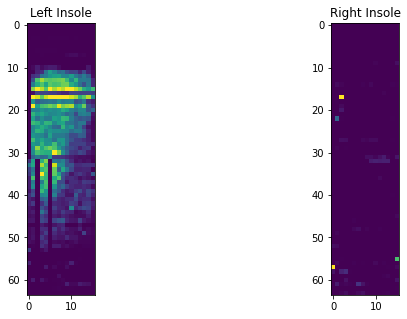

In [33]:
from matplotlib.animation import FuncAnimation


# Assuming 'insoleAll_l' and 'insoleAll_r' are NumPy arrays
# For example, they should have shape (num_frames, 1024) for 64x16 heatmaps per frame
num_frames = 300  # Number of frames in your data

# Set up the figure and axis for both left and right insoles
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create the initial heatmap plots for both left and right insoles
img_l = axs[0].imshow(np.zeros((64, 16)), cmap='viridis')
axs[0].set_title("Left Insole")

img_r = axs[1].imshow(np.zeros((64, 16)),cmap='viridis')
axs[1].set_title("Right Insole")

# Function to update the heatmaps for each frame
def update(frame):
    # Left Insole Heatmap
    insole_l = insoleAll_l[frame]  # Get the left insole data for current frame
    img_l_data = np.reshape(insole_l, (64, 16), order='F')
    
    # Right Insole Heatmap
    insole_r = insoleAll_r[frame]  # Get the right insole data for current frame
    img_r_data = np.reshape(insole_r, (64, 16), order='F')
    img_r_data = np.fliplr(img_r_data)  # Flip the right insole image left-right
    
    # Flip the top 32 rows of each 
    img_l_data[:32,] = np.flipud(img_l_data[:32,])
    img_r_data[:32,] = np.flipud(img_r_data[:32,])

    # Update heatmap data for each subplot
    axs[0].imshow(img_l_data)
    axs[1].imshow(img_r_data)

    return img_l, img_r

# Create the animation using FuncAnimation
anim = FuncAnimation(fig, update, frames=num_frames, interval=200, blit=True)

# Display the animation
anim.save('walking_anim_roemlab.mp4', writer = 'ffmpeg', fps = 10) 

In [37]:
np.shape(insoleAll_l)

(5218, 1024)

In [43]:
#1200 frames, 10 subframes